In [97]:
### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr

In [2]:
yf.pdr_override()
df = pdr.get_data_yahoo("RTY=F", start="2016-03-01", end="2023-04-05")
#df = pd.DataFrame(data = df, columns=['Open','High', 'Low','Close','Adj Close','Volume'])
if isinstance(df, pd.DataFrame):
    df.head()

[*********************100%***********************]  1 of 1 completed


In [3]:
df.to_csv("Price_RTYF.csv")

In [234]:
df=pd.read_csv('Price_RTYF.csv')

In [235]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,7/10/2017,1416.400024,1419.300049,1403.699951,1408.699951,1408.699951,2658.0
1,7/11/2017,1408.599976,1414.099976,1400.000000,1413.099976,1413.099976,5843.0
2,7/12/2017,1413.500000,1432.800049,1411.599976,1422.599976,1422.599976,5998.0
3,7/13/2017,1422.800049,1426.000000,1413.800049,1425.800049,1425.800049,4203.0
4,7/14/2017,1425.699951,1433.300049,1420.800049,1428.599976,1428.599976,4915.0


In [236]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1444,3/30/2023,1783.199951,1802.400024,1773.300049,1780.099976,1780.099976,166271.0
1445,3/31/2023,1781.099976,1817.099976,1777.800049,1813.500000,1813.500000,222697.0
1446,4/3/2023,1810.199951,1827.400024,1793.300049,1814.199951,1814.199951,195788.0
1447,4/4/2023,1813.699951,1823.000000,1771.500000,1780.900024,1780.900024,195788.0
1448,4/5/2023,1764.220000,NaN,NaN,NaN,NaN,NaN


In [237]:
df.shape

(1449, 7)

In [238]:
df1=df.reset_index()['Open']

In [239]:
df1

0       1416.400024
1       1408.599976
2       1413.500000
3       1422.800049
4       1425.699951
           ...     
1444    1783.199951
1445    1781.099976
1446    1810.199951
1447    1813.699951
1448    1764.220000
Name: Open, Length: 1449, dtype: float64

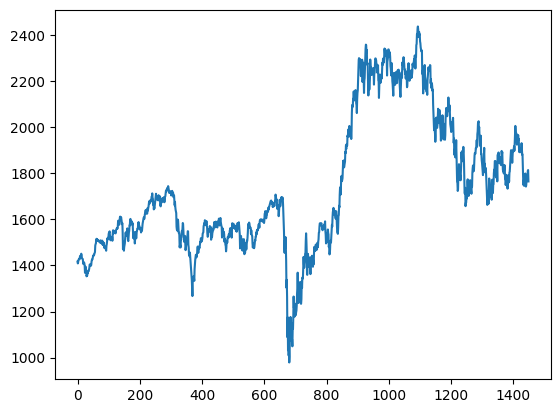

In [240]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [241]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [242]:
import numpy as np

In [243]:
df1

0       1416.400024
1       1408.599976
2       1413.500000
3       1422.800049
4       1425.699951
           ...     
1444    1783.199951
1445    1781.099976
1446    1810.199951
1447    1813.699951
1448    1764.220000
Name: Open, Length: 1449, dtype: float64

In [244]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [245]:
df1

array([[0.30014411],
       [0.29479171],
       [0.29815411],
       ...,
       [0.57036981],
       [0.57277151],
       [0.53881834]])

In [246]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [247]:
training_size,test_size

(941, 508)

In [248]:
train_data

array([[0.30014411],
       [0.29479171],
       [0.29815411],
       [0.30453581],
       [0.30652572],
       [0.30885882],
       [0.30872161],
       [0.30721192],
       [0.31681873],
       [0.31777943],
       [0.31283882],
       [0.31325052],
       [0.32368074],
       [0.31846563],
       [0.31064293],
       [0.30906471],
       [0.30872161],
       [0.30769231],
       [0.29657582],
       [0.29266451],
       [0.29685031],
       [0.29794822],
       [0.2946545 ],
       [0.28792971],
       [0.26679478],
       [0.26960819],
       [0.28497909],
       [0.276676  ],
       [0.27585259],
       [0.25643309],
       [0.26048169],
       [0.25835448],
       [0.2677554 ],
       [0.26555959],
       [0.2711864 ],
       [0.2721471 ],
       [0.27200989],
       [0.2775681 ],
       [0.28182251],
       [0.29129211],
       [0.29197831],
       [0.2888904 ],
       [0.2888904 ],
       [0.28792971],
       [0.2899197 ],
       [0.29973241],
       [0.30474162],
       [0.306

In [249]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [250]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [251]:
print(X_train.shape), print(y_train.shape)

(840, 100)
(840,)


(None, None)

In [252]:
print(X_test.shape), print(ytest.shape)

(407, 100)
(407,)


(None, None)

In [253]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [254]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [255]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [256]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_16 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [257]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_16 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [258]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 14s 398ms/step - loss: 0.0580 - val_loss: 0.0561
Epoch 2/100
14/14 [==============================] - 3s 184ms/step - loss: 0.0124 - val_loss: 0.0058
Epoch 3/100
14/14 [==============================] - 4s 267ms/step - loss: 0.0063 - val_loss: 0.0038
Epoch 4/100
14/14 [==============================] - 3s 189ms/step - loss: 0.0041 - val_loss: 0.0029
Epoch 5/100
14/14 [==============================] - 4s 263ms/step - loss: 0.0030 - val_loss: 0.0040
Epoch 6/100
14/14 [==============================] - 2s 176ms/step - loss: 0.0026 - val_loss: 0.0059
Epoch 7/100
14/14 [==============================] - 3s 242ms/step - loss: 0.0025 - val_loss: 0.0032
Epoch 8/100
14/14 [==============================] - 2s 179ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 9/100
14/14 [==============================] - 5s 367ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 10/100
14/14 [==============================] - 4s 285ms/step - loss: 0.0025 - val_l

14/14 [==============================] - 2s 173ms/step - loss: 6.7292e-04 - val_loss: 0.0012
Epoch 81/100
14/14 [==============================] - 3s 208ms/step - loss: 6.1084e-04 - val_loss: 9.8156e-04
Epoch 82/100
14/14 [==============================] - 3s 218ms/step - loss: 5.6717e-04 - val_loss: 0.0017
Epoch 83/100
14/14 [==============================] - 3s 189ms/step - loss: 5.7224e-04 - val_loss: 9.7263e-04
Epoch 84/100
14/14 [==============================] - 3s 251ms/step - loss: 5.7063e-04 - val_loss: 9.1615e-04
Epoch 85/100
14/14 [==============================] - 3s 207ms/step - loss: 5.3438e-04 - val_loss: 0.0017
Epoch 86/100
14/14 [==============================] - 2s 178ms/step - loss: 5.1350e-04 - val_loss: 0.0021
Epoch 87/100
14/14 [==============================] - 3s 245ms/step - loss: 5.7142e-04 - val_loss: 0.0031
Epoch 88/100
14/14 [==============================] - 3s 196ms/step - loss: 5.6294e-04 - val_loss: 0.0016
Epoch 89/100
14/14 [===========================

In [259]:
import tensorflow as tf

In [260]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

13/13 [==============================] - 1s 41ms/step


In [261]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [262]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1608.7416186513342

In [263]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1969.6759313018374

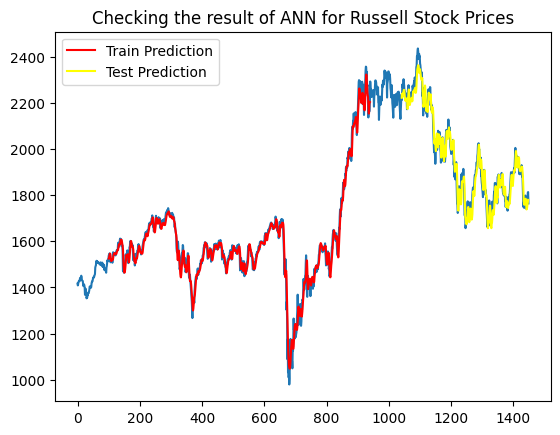

In [264]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot, color = "red", label = "Train Prediction")
plt.plot(testPredictPlot, color = "yellow", label = "Test Prediction")
plt.legend()
plt.title("Checking the result of ANN for Russell Stock Prices")
plt.show()

In [265]:
len(test_data)

508

In [266]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 167)

In [267]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [268]:
temp_input

[0.6618403675082838,
 0.6422836536938867,
 0.679407083448194,
 0.6876414892647822,
 0.7115899026501715,
 0.7150895086534099,
 0.7179029134857322,
 0.6950524874373349,
 0.7004734884216011,
 0.6701433769045322,
 0.6459891527801631,
 0.6446853553903915,
 0.659164169149081,
 0.674946780297542,
 0.620119344413746,
 0.6205997348456824,
 0.6019350315687804,
 0.593769313048311,
 0.5798394095847588,
 0.570301206378399,
 0.5576064974111588,
 0.5829273117659795,
 0.5953475240705217,
 0.6212859353303981,
 0.6387154447971888,
 0.5846428129777688,
 0.5915734214045856,
 0.5722912042528863,
 0.5647429989210135,
 0.5787415052780254,
 0.5622040907513892,
 0.5381870737863401,
 0.5156110606841817,
 0.48308514123984647,
 0.46901803130317465,
 0.4753997294348544,
 0.5092979661321622,
 0.4830165376601865,
 0.4722431399575149,
 0.5078569622692712,
 0.5475879868031213,
 0.5420983829253958,
 0.532766072802074,
 0.495917056680206,
 0.4921429540142699,
 0.495368146385069,
 0.492691948025866,
 0.5183558626230447,


In [269]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=166
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.64228365 0.67940708 0.68764149 0.7115899  0.71508951 0.71790291
 0.69505249 0.70047349 0.67014338 0.64598915 0.64468536 0.65916417
 0.67494678 0.62011934 0.62059973 0.60193503 0.59376931 0.57983941
 0.57030121 0.5576065  0.58292731 0.59534752 0.62128594 0.63871544
 0.58464281 0.59157342 0.5722912  0.564743   0.57874151 0.56220409
 0.53818707 0.51561106 0.48308514 0.46901803 0.47539973 0.50929797
 0.48301654 0.47224314 0.50785696 0.54758799 0.54209838 0.53276607
 0.49591706 0.49214295 0.49536815 0.49269195 0.51835586 0.48445754
 0.52906057 0.54408838 0.51739517 0.50422015 0.53084468 0.53125638
 0.5630275  0.5738695  0.56927191 0.59939612 0.59967062 0.59960202
 0.5592534  0.55067589 0.55774379 0.57201671 0.57201671 0.53901048
 0.61675703 0.61902144 0.61229673 0.62499144 0.60584642 0.59363202
 0.59980783 0.59253412 0.60715022 0.61078703 0.60934603 0.58718172
 0.58910312 0.62952034 0.61936454 0.62650104 0.59246551 0.5729774
 0.56831121 0.57682011 0.56254719 0.57709461 0.5877

4 day output [[0.5092276]]
5 day input [0.71790291 0.69505249 0.70047349 0.67014338 0.64598915 0.64468536
 0.65916417 0.67494678 0.62011934 0.62059973 0.60193503 0.59376931
 0.57983941 0.57030121 0.5576065  0.58292731 0.59534752 0.62128594
 0.63871544 0.58464281 0.59157342 0.5722912  0.564743   0.57874151
 0.56220409 0.53818707 0.51561106 0.48308514 0.46901803 0.47539973
 0.50929797 0.48301654 0.47224314 0.50785696 0.54758799 0.54209838
 0.53276607 0.49591706 0.49214295 0.49536815 0.49269195 0.51835586
 0.48445754 0.52906057 0.54408838 0.51739517 0.50422015 0.53084468
 0.53125638 0.5630275  0.5738695  0.56927191 0.59939612 0.59967062
 0.59960202 0.5592534  0.55067589 0.55774379 0.57201671 0.57201671
 0.53901048 0.61675703 0.61902144 0.61229673 0.62499144 0.60584642
 0.59363202 0.59980783 0.59253412 0.60715022 0.61078703 0.60934603
 0.58718172 0.58910312 0.62952034 0.61936454 0.62650104 0.59246551
 0.5729774  0.56831121 0.57682011 0.56254719 0.57709461 0.58773072
 0.58121181 0.54456869 

11 day output [[0.46017784]]
12 day input [0.67494678 0.62011934 0.62059973 0.60193503 0.59376931 0.57983941
 0.57030121 0.5576065  0.58292731 0.59534752 0.62128594 0.63871544
 0.58464281 0.59157342 0.5722912  0.564743   0.57874151 0.56220409
 0.53818707 0.51561106 0.48308514 0.46901803 0.47539973 0.50929797
 0.48301654 0.47224314 0.50785696 0.54758799 0.54209838 0.53276607
 0.49591706 0.49214295 0.49536815 0.49269195 0.51835586 0.48445754
 0.52906057 0.54408838 0.51739517 0.50422015 0.53084468 0.53125638
 0.5630275  0.5738695  0.56927191 0.59939612 0.59967062 0.59960202
 0.5592534  0.55067589 0.55774379 0.57201671 0.57201671 0.53901048
 0.61675703 0.61902144 0.61229673 0.62499144 0.60584642 0.59363202
 0.59980783 0.59253412 0.60715022 0.61078703 0.60934603 0.58718172
 0.58910312 0.62952034 0.61936454 0.62650104 0.59246551 0.5729774
 0.56831121 0.57682011 0.56254719 0.57709461 0.58773072 0.58121181
 0.54456869 0.54319629 0.52816848 0.53804978 0.55856719 0.53901048
 0.54491179 0.5369518

18 day output [[0.38142657]]
19 day input [0.5576065  0.58292731 0.59534752 0.62128594 0.63871544 0.58464281
 0.59157342 0.5722912  0.564743   0.57874151 0.56220409 0.53818707
 0.51561106 0.48308514 0.46901803 0.47539973 0.50929797 0.48301654
 0.47224314 0.50785696 0.54758799 0.54209838 0.53276607 0.49591706
 0.49214295 0.49536815 0.49269195 0.51835586 0.48445754 0.52906057
 0.54408838 0.51739517 0.50422015 0.53084468 0.53125638 0.5630275
 0.5738695  0.56927191 0.59939612 0.59967062 0.59960202 0.5592534
 0.55067589 0.55774379 0.57201671 0.57201671 0.53901048 0.61675703
 0.61902144 0.61229673 0.62499144 0.60584642 0.59363202 0.59980783
 0.59253412 0.60715022 0.61078703 0.60934603 0.58718172 0.58910312
 0.62952034 0.61936454 0.62650104 0.59246551 0.5729774  0.56831121
 0.57682011 0.56254719 0.57709461 0.58773072 0.58121181 0.54456869
 0.54319629 0.52816848 0.53804978 0.55856719 0.53901048 0.54491179
 0.53695188 0.51732656 0.54498039 0.55650859 0.53496188 0.55060729
 0.53839288 0.5653606 

25 day output [[0.2579738]]
26 day input [0.5722912  0.564743   0.57874151 0.56220409 0.53818707 0.51561106
 0.48308514 0.46901803 0.47539973 0.50929797 0.48301654 0.47224314
 0.50785696 0.54758799 0.54209838 0.53276607 0.49591706 0.49214295
 0.49536815 0.49269195 0.51835586 0.48445754 0.52906057 0.54408838
 0.51739517 0.50422015 0.53084468 0.53125638 0.5630275  0.5738695
 0.56927191 0.59939612 0.59967062 0.59960202 0.5592534  0.55067589
 0.55774379 0.57201671 0.57201671 0.53901048 0.61675703 0.61902144
 0.61229673 0.62499144 0.60584642 0.59363202 0.59980783 0.59253412
 0.60715022 0.61078703 0.60934603 0.58718172 0.58910312 0.62952034
 0.61936454 0.62650104 0.59246551 0.5729774  0.56831121 0.57682011
 0.56254719 0.57709461 0.58773072 0.58121181 0.54456869 0.54319629
 0.52816848 0.53804978 0.55856719 0.53901048 0.54491179 0.53695188
 0.51732656 0.54498039 0.55650859 0.53496188 0.55060729 0.53839288
 0.5653606  0.5678309  0.58471142 0.60255263 0.62238384 0.63164755
 0.63164755 0.62759895

In [270]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [271]:
import matplotlib.pyplot as plt

In [272]:
len(df1)

1449

In [273]:
 scaler.inverse_transform(lst_output)

array([[1778.11201119],
       [1761.60851995],
       [1746.73785779],
       [1733.35592091],
       [1721.09736836],
       [1709.86917109],
       [1699.5494185 ],
       [1689.86332312],
       [1680.42586979],
       [1670.82090337],
       [1660.65954337],
       [1649.61718704],
       [1637.44510546],
       [1623.97231108],
       [1609.092485  ],
       [1592.75103453],
       [1574.92793803],
       [1555.62371667],
       [1534.85296323],
       [1512.64151912],
       [1489.03446564],
       [1464.10785033],
       [1437.98831779],
       [1410.87517252],
       [1383.0604875 ],
       [1354.94521705],
       [1327.04099919],
       [1299.95551942],
       [1274.35466071],
       [1250.90645583]])

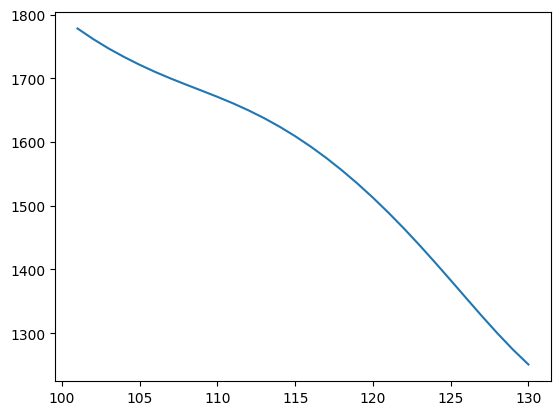

In [274]:
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [275]:
df1

array([[0.30014411],
       [0.29479171],
       [0.29815411],
       ...,
       [0.57036981],
       [0.57277151],
       [0.53881834]])

In [276]:
scaler.inverse_transform(lst_output)

array([[1778.11201119],
       [1761.60851995],
       [1746.73785779],
       [1733.35592091],
       [1721.09736836],
       [1709.86917109],
       [1699.5494185 ],
       [1689.86332312],
       [1680.42586979],
       [1670.82090337],
       [1660.65954337],
       [1649.61718704],
       [1637.44510546],
       [1623.97231108],
       [1609.092485  ],
       [1592.75103453],
       [1574.92793803],
       [1555.62371667],
       [1534.85296323],
       [1512.64151912],
       [1489.03446564],
       [1464.10785033],
       [1437.98831779],
       [1410.87517252],
       [1383.0604875 ],
       [1354.94521705],
       [1327.04099919],
       [1299.95551942],
       [1274.35466071],
       [1250.90645583]])

In [277]:
df1 = scaler.inverse_transform(df1[1158:])
lst_output = scaler.inverse_transform(lst_output)

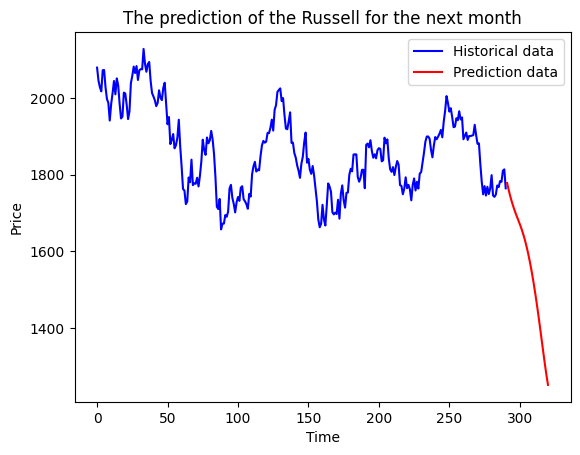

In [278]:
# plot df1
plt.plot(df1, color='blue', label='Historical data')

# plot lst_output starting at the end of df1
plt.plot(range(len(df1), len(df1) + len(lst_output)), lst_output, color='red', label='Prediction data')

# add legend and labels
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title("The prediction of the Russell for the next month")

# show the plot
plt.show()